# CS188 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline
import random 
  
random.seed(42) 

In [2]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## [20 Points] Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [44]:
data = pd.read_csv("./heartdisease.csv")

### Question 1.1 Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method to display some of the rows so we can visualize the types of data fields we'll be working with, then use the describe method, along with any additional methods you'd like to call to better help you understand what you're working with and what issues you might face. 

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
sick        303 non-null bool
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


In [8]:
null_data = data[data.isnull().any(axis=1)]
null_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick


### Question 1.2 Discuss your data preprocessing strategy. Are their any datafield types that are problemmatic and why? Will there be any null values you will have to impute and how do you intend to do so? Finally, for your numeric and categorical features, what if any, additional preprocessing steps will you take on those data elements?

[Use this area to discuss your data processing strategy] 

### Question 1.3  Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe.

In [46]:
data.sick = data.sick.replace({True: 1, False: 0})
#data.info()

### Question 1.4 Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? (Note: No need to describe each variable, but pick out a few you wish to highlight)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B88AE3CCC8>,
      dtype=object)

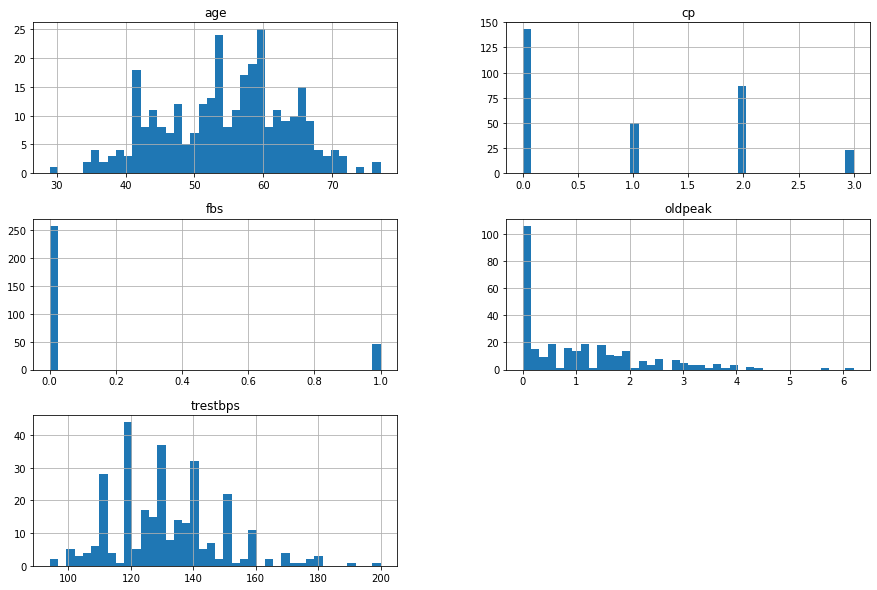

In [21]:
features = ["age","cp","trestbps","fbs","oldpeak"]
data[features].hist(bins=40, figsize=(15,10))


### Question 1.5 We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

Number of sick patients: 138
Number of healthy patients: 165


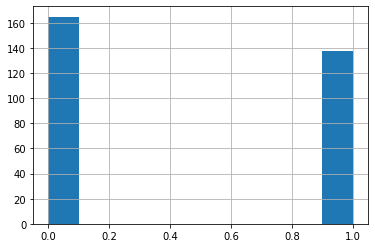

In [33]:
data["sick"].hist()
print("Number of sick patients: {}".format(data["sick"].isin([1]).sum()))
print("Number of healthy patients: {}".format(data["sick"].isin([0]).sum()))

[Include description of findings here] 

The number of sick patients are 138 while the number of healthy patients are 165.


### Question  1.6 Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

[Discuss problem here] 

### Question 1.9 Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

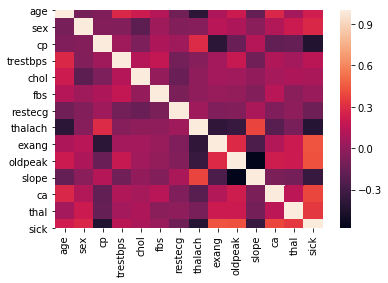

In [47]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix)

[Discuss correlations here] 

## [30 Points] Part 2. Prepare the Data 

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Question 2.1 Save the target column as a separate array and then drop it from the dataframe. 

In [54]:
target_column = data.sick

new_data = data.drop("sick", axis=1)

### Question 2.2 First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [73]:
raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(new_data, 
                                                                    target_column, 
                                                                    test_size=0.3, random_state=42)

print(raw_x_train.shape, raw_x_test.shape, raw_y_train.shape, raw_y_test.shape)

(212, 13) (91, 13) (212,) (91,)


### Question 2.3 Now create a pipeline to conduct any additional preparation of the data you would like. Output the resulting array to ensure it was processed correctly.

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

data_cat_features = ["sex","cp","fbs","restecg","exang","slope","ca", "thal"]

data_num = new_data.drop(columns=data_cat_features)

data_num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

data_num_tr = data_num_pipeline.fit_transform(data_num)
data_num_features = list(data_num)

data_full_pipeline = ColumnTransformer([
    ("num", data_num_pipeline, data_num_features),
    ("cat", OneHotEncoder(sparse=False, handle_unknown='ignore'), data_cat_features),
])

data_prepared = data_full_pipeline.fit_transform(new_data)
data_prepared = pd.DataFrame(data_prepared)

data_prepared.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.180175,0.478391,0.922521,0.146634,0.224643,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,-1.143291,-0.663867,0.323431,1.021244,-0.896862,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,-0.260980,2.306004,-0.913400,0.540209,-0.465514,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.290464,1.049520,-1.512490,1.064975,0.483451,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Question 2.4 Now create a separate, processed training data set by dividing your processed dataframe into training and testing cohorts, using the same settings as Q2.2 (REMEMBER TO USE DIFFERENT TRAINING AND TESTING VARIABLES SO AS NOT TO OVERWRITE YOUR PREVIOUS DATA). Output the resulting shapes of your training and testing samples to confirm that your split was successful, and describe what differences there are between your two training datasets.

In [69]:
x_train, x_test, y_train, y_test = train_test_split(data_prepared, target_column, test_size=0.3,random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(212, 30) (91, 30) (212,) (91,)


[What differences are there between these two datasets?]

## [50 Points] Part 3. Learning Methods 

We're finally ready to actually begin classifying our data. To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Question 3.1.1 Implement a Support Vector Machine classifier on your RAW dataset. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [81]:
# SVM
raw_svm = SVC(probability=True, gamma='auto')
raw_svm.fit(raw_x_train, raw_y_train)
raw_svm_predicted = raw_svm.predict(raw_x_test)
raw_score = raw_svm.predict_proba(raw_x_test)

### Question 3.1.2 Report the accuracy, precision, recall, F1 Score, and confusion matrix of the resulting model.

Accuracy:    0.560440
Precision:   1.000000
Recall:      0.024390
F1 score:    0.047619
Confusion Matrix for Raw Data: 



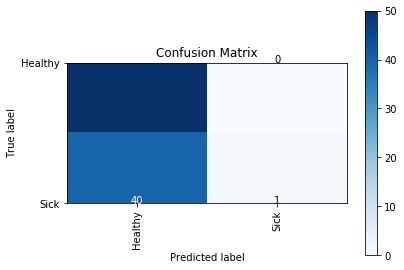

In [82]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(raw_y_test, raw_svm_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(raw_y_test, raw_svm_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(raw_y_test, raw_svm_predicted)))
print("%-12s %f" % ('F1 score:', metrics.f1_score(raw_y_test, raw_svm_predicted)))

print("Confusion Matrix for Raw Data: \n")
draw_confusion_matrix(raw_y_test, raw_svm_predicted, ["Healthy","Sick"])

### Question 3.1.3 Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

[Provide explanation for each measure here] 

### Question 3.1.4 Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

Raw SVM Model Performance Results: 



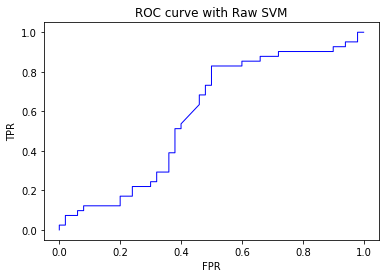

In [86]:
print("Raw SVM Model Performance Results: \n")

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(raw_y_test, raw_score[:, 1], pos_label=1)

pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color='blue', lw=1)
pyplot.title("ROC curve with Raw SVM")
pyplot.xlabel("FPR")
pyplot.ylabel("TPR")
pyplot.show()

[Describe what an ROC Curve is and what the results mean here] 

### Question 3.1.5 Rerun, using the exact same settings, only this time use your processed data as inputs. 

In [87]:
svm = SVC(probability=True, gamma='auto')
svm.fit(x_train, y_train)
svm_predicted = svm.predict(x_test)
score = svm.predict_proba(x_test)

### Question 3.1.6 Report the accuracy, precision, recall, F1 Score, confusion matrix, and plot the ROC Curve of the resulting model.

Accuracy:    0.868132
Precision:   0.871795
Recall:      0.829268
F1 score:    0.850000
Confusion Matrix for Data: 



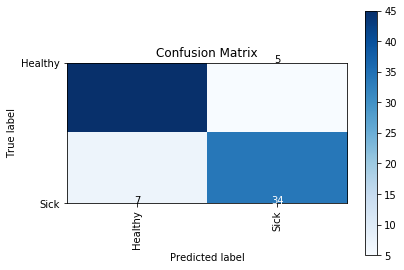

In [88]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, svm_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, svm_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, svm_predicted)))
print("%-12s %f" % ('F1 score:', metrics.f1_score(y_test, svm_predicted)))

print("Confusion Matrix for Data: \n")
draw_confusion_matrix(y_test, svm_predicted, ["Healthy","Sick"])

SVM Model Performance Results: 



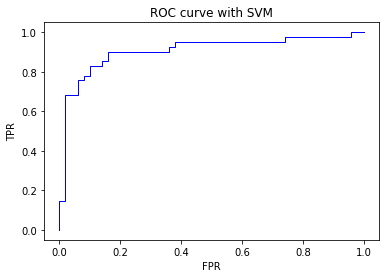

In [90]:
print("SVM Model Performance Results: \n")

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, score[:, 1], pos_label=1)

pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color='blue', lw=1)
pyplot.title("ROC curve with SVM")
pyplot.xlabel("FPR")
pyplot.ylabel("TPR")
pyplot.show()

### Question 3.1.7 Hopefully you've noticed a dramatic change in performance. Discuss why you think your new data has had such a dramatic impact. 

[Provide explanation here]

### Question 3.1.8 Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [91]:
# SVM
svm = SVC(probability=True, gamma='auto', kernel='linear')
svm.fit(x_train, y_train)
svm_predicted = svm.predict(x_test)
score = svm.predict_proba(x_test)

Accuracy:    0.835165
Precision:   0.825000
Recall:      0.804878
F1 score:    0.814815
Confusion Matrix for Data (Linear): 



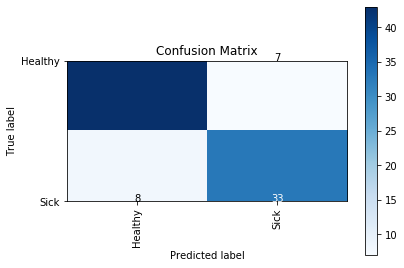

In [92]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, svm_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, svm_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, svm_predicted)))
print("%-12s %f" % ('F1 score:', metrics.f1_score(y_test, svm_predicted)))

print("Confusion Matrix for Data (Linear): \n")
draw_confusion_matrix(y_test, svm_predicted, ["Healthy","Sick"])

Linear SVM Model Performance Results: 



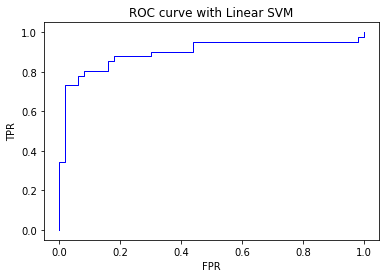

In [93]:
print("Linear SVM Model Performance Results: \n")

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, score[:, 1], pos_label=1)

pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color='blue', lw=1)
pyplot.title("ROC curve with Linear SVM")
pyplot.xlabel("FPR")
pyplot.ylabel("TPR")
pyplot.show()

### Question 3.1.9 Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

[Provide explanation here]

### Logistic Regression

Knowing that we're dealing with a linearly configured dataset, let's now try another classifier that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Question 3.2.1 Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. For this initial model set the solver = 'sag' and max_iter= 10). Report on the same four metrics as the SVM and graph the resulting ROC curve.

In [94]:
# Logistic Regression
logistic = LogisticRegression(solver='sag', max_iter=10)
logistic.fit(x_train, y_train)
logistic_predicted = logistic.predict(x_test)
logistic_score = logistic.predict_proba(x_test)

C:\Users\param\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy:    0.857143
Precision:   0.868421
Recall:      0.804878
F1 score:    0.835443
Confusion Matrix for Data (Logistic): 



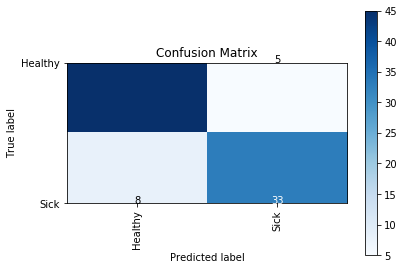

In [95]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, logistic_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, logistic_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, logistic_predicted)))
print("%-12s %f" % ('F1 score:', metrics.f1_score(y_test, logistic_predicted)))

print("Confusion Matrix for Data (Logistic): \n")
draw_confusion_matrix(y_test, logistic_predicted, ["Healthy","Sick"])

Logistic Regression Model Performance Results: 



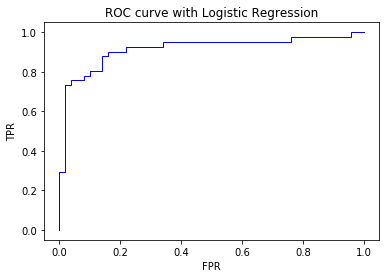

In [96]:
print("Logistic Regression Model Performance Results: \n")

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, logistic_score[:, 1], pos_label=1)

pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color='blue', lw=1)
pyplot.title("ROC curve with Logistic Regression")
pyplot.xlabel("FPR")
pyplot.ylabel("TPR")
pyplot.show()

### Question 3.2.2 Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [108]:
# Logistic Regression
logistic = LogisticRegression(solver='sag', max_iter=1000)
logistic.fit(x_train, y_train)
logistic_predicted = logistic.predict(x_test)
logistic_score = logistic.predict_proba(x_test)

Accuracy:    0.857143
Precision:   0.868421
Recall:      0.804878
F1 score:    0.835443
Confusion Matrix for Data (Logistic): 



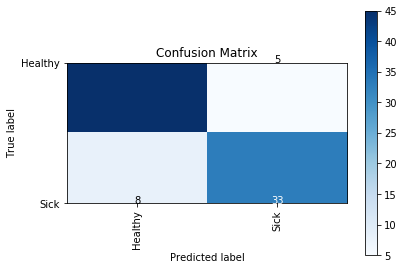

In [109]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, logistic_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, logistic_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, logistic_predicted)))
print("%-12s %f" % ('F1 score:', metrics.f1_score(y_test, logistic_predicted)))

print("Confusion Matrix for Data (Logistic): \n")
draw_confusion_matrix(y_test, logistic_predicted, ["Healthy","Sick"])

Logistic Regression Model Performance Results: 



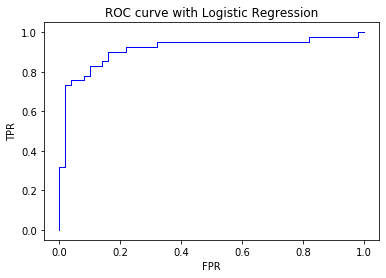

In [110]:
print("Logistic Regression Model Performance Results: \n")

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, logistic_score[:, 1], pos_label=1)

pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color='blue', lw=1)
pyplot.title("ROC curve with Logistic Regression")
pyplot.xlabel("FPR")
pyplot.ylabel("TPR")
pyplot.show()

### Question 3.2.3 Explain what you changed, and why that produced an improved outcome. 

[Provide explanation here] 

### Question 3.2.4 Rerun your logistic classifier, but modify the penalty = 'none', solver='sag' and again report the results.

In [115]:
# Logistic Regression
logistic = LogisticRegression(penalty='none', solver='sag', max_iter=100000)
logistic.fit(x_train, y_train)
logistic_predicted = logistic.predict(x_test)
logistic_score = logistic.predict_proba(x_test)

Accuracy:    0.835165
Precision:   0.825000
Recall:      0.804878
F1 score:    0.814815
Confusion Matrix for Data (Logistic): 



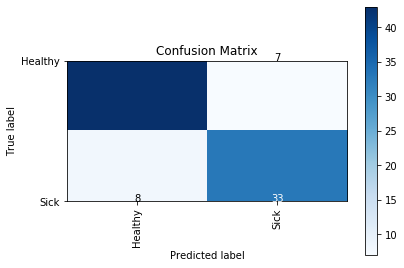

In [116]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, logistic_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, logistic_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, logistic_predicted)))
print("%-12s %f" % ('F1 score:', metrics.f1_score(y_test, logistic_predicted)))

print("Confusion Matrix for Data (Logistic): \n")
draw_confusion_matrix(y_test, logistic_predicted, ["Healthy","Sick"])

Logistic Regression Model Performance Results: 



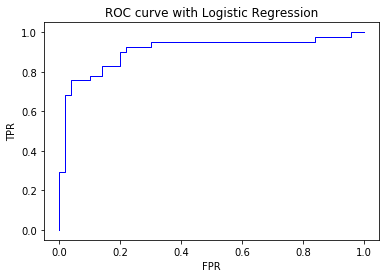

In [117]:
print("Logistic Regression Model Performance Results: \n")

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, logistic_score[:, 1], pos_label=1)

pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color='blue', lw=1)
pyplot.title("ROC curve with Logistic Regression")
pyplot.xlabel("FPR")
pyplot.ylabel("TPR")
pyplot.show()

### Question 3.2.5 Explain what what the penalty parameter is doing in this function, what the solver method is, and why this combination likely produced a more optimal outcome. 

[Provide explanation here] 

### Question 3.2.6 Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

[Provide Answer here:] 

### Clustering Approaches 

Let us now try a different approach to classification using a clustering algorithm. Specifically, we're going to be using K-Nearest Neighbor, one of the most popular clustering approaches. 

### K-Nearest Neighbor  

### Question 3.3.1 Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [119]:
# k-Nearest Neighbors algorithm
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
KNN_predicted = KNN.predict(x_test)
KNN_score = KNN.predict_proba(x_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, KNN_predicted)))

Accuracy:    0.868132


### Question 3.3.2 For clustering algorithms, we use different measures to determine the effectiveness of the model. Specifically here, we're interested in the Homogeneity Score, Completeness Score, V-Measure, Adjusted Rand Score, and Adjusted Mutual Information. Calculate each score (hint review the SKlearn Metrics Clustering documentation for how to implement).

In [123]:
print("%-12s %f" % ('Homogeneity Score:', metrics.homogeneity_score(y_test, KNN_predicted)))
print("%-12s %f" % ('Completeness Score:', metrics.completeness_score(y_test, KNN_predicted)))
print("%-12s %f" % ('V-Measure Score:', metrics.v_measure_score(y_test, KNN_predicted)))
print("%-12s %f" % ('Adjusted Rand Score:', metrics.adjusted_rand_score(y_test, KNN_predicted)))
print("%-12s %f" % ('Adjusted Mutual Information:', 
                    metrics.adjusted_mutual_info_score(y_test, KNN_predicted, average_method='arithmetic')))

Homogeneity Score: 0.434542
Completeness Score: 0.434542
V-Measure Score: 0.434542
Adjusted Rand Score: 0.536996
Adjusted Mutual Information: 0.429912


### Question 3.3.3 Explain what each score means and interpret the results for this particular model. 

[Input answer here] 

As we're beginning to see, the input parameters for your model can dramatically impact the performance of the model. How do you know which settings to choose? Studying the models and studying your datasets are critical as they can help you anticipate which models and settings are likely to produce optimal results. However sometimes that isn't enough, and a brute force method is necessary to determine which parameters to use. For this next question we'll attempt to optimize a parameter using a brute force approach. 

### Question 3.3.4 Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 10, 20, 50, and 100. Run your model for each value and report the 6 measures (5 clustering specific plus accuracy) for each. Report on which n value produces the best accuracy and V-Measure. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [125]:
l = [1, 2, 3, 5, 10, 20, 50, 100]

for i in l:
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    KNN_predicted = KNN.predict(x_test)
    KNN_score = KNN.predict_proba(x_test)
    
    print("Number of neighbors:", i)
    print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, KNN_predicted)))
    print("%-12s %f" % ('Homogeneity Score:', metrics.homogeneity_score(y_test, KNN_predicted)))
    print("%-12s %f" % ('Completeness Score:', metrics.completeness_score(y_test, KNN_predicted)))
    print("%-12s %f" % ('V-Measure Score:', metrics.v_measure_score(y_test, KNN_predicted)))
    print("%-12s %f" % ('Adjusted Rand Score:', metrics.adjusted_rand_score(y_test, KNN_predicted)))
    print("%-12s %f" % ('Adjusted Mutual Information:', 
                        metrics.adjusted_mutual_info_score(y_test, 
                                                           KNN_predicted, average_method='arithmetic')))
    print("")

Number of neighbors: 1
Accuracy:    0.747253
Homogeneity Score: 0.180080
Completeness Score: 0.180717
V-Measure Score: 0.180398
Adjusted Rand Score: 0.236145
Adjusted Mutual Information: 0.173675

Number of neighbors: 2
Accuracy:    0.802198
Homogeneity Score: 0.298268
Completeness Score: 0.327995
V-Measure Score: 0.312426
Adjusted Rand Score: 0.358337
Adjusted Mutual Information: 0.306507

Number of neighbors: 3
Accuracy:    0.835165
Homogeneity Score: 0.364809
Completeness Score: 0.362262
V-Measure Score: 0.363531
Adjusted Rand Score: 0.443216
Adjusted Mutual Information: 0.358339

Number of neighbors: 5
Accuracy:    0.868132
Homogeneity Score: 0.434542
Completeness Score: 0.434542
V-Measure Score: 0.434542
Adjusted Rand Score: 0.536996
Adjusted Mutual Information: 0.429912

Number of neighbors: 10
Accuracy:    0.846154
Homogeneity Score: 0.377564
Completeness Score: 0.384636
V-Measure Score: 0.381067
Adjusted Rand Score: 0.473520
Adjusted Mutual Information: 0.375949

Number of neig

[Describe optimal results here]

### Question 3.3.5 When are clustering algorithms most effective, and what do you think  explains the comparative results we achieved?  

[Input answer here] 